# **Computer Vision - ENG301_Spring2023**

> **REPORT - ASSIGNMENT 2 - REPORT**


> **Pham Hoang Lan UG190042**

# **PACKAGE IMPORTATION**

In [52]:
# Package importation
import numpy as np
import cv2
import glob
from IPython import display
import matplotlib.pyplot as plt
import matplotlib
# from plyfile import PlyData, PlyElement

# Activate the environment: .\opencv-env\Scripts\activate

# **I. THEORY**

## **Prompt**

When setting up a simple stereo system, we observe that a point on one image plane can be found on the other image by searching along a horizontal line of the same vertical coordinate. This observation is then used to simplify the process of finding correspondences. In fact, this observation can be mathematically proved by using the essential matrix. Derive equations to prove the above statement.

Specifically, you are given:

1. A simple stereo system with **two cameras** put in parallel and at the **same height**. They have the **same focal length $f$ and baseline B**.
2. A point P in the real world and its projection $p_1 =\left(u,v\right)$ on the left image.

***You need to prove that the projection of point P on the right image lies on a horizontal line having the same vertical coordinate as $p_1$.***

## **Answer**

### *Triangulation*

__Figure 1:__ Illustration of the triangulation concept

![Figure 1](reportImage\triangulation.jpg)

The depth of the point (P) can be calculated by triangulation, as shown in Figure 1. 

> This figure illustrates two views of P from different cameras ($C_1$ and $C_2$), which are known 3D positions. 

> The images of P from the left and right cameras are $p_1$ and $p_2$, respectively. These are called **corresponding points** because they represent the same 3D point. 

$\rightarrow$ We use $p_1$ along with $C_1$ to get the direction vector $L_1$, and $p_2$ along with $C_2$ to get $L_2$. Then we use triangulation to find P as we did in Figure 2.

$\rightarrow$ The key requirements for triangulating a 3D point from two images with two cameras are:

 1. Position of the cameras: $C_1$ and $C_2$
 2. Point correspondence: $p_1$ and $p_2$

### *Epipolar geometry*

__Figure 2:__ Illustration of the epipolar geometry concept

![Figure 2](reportImage\epipolar_geo.jpg)

We assume the two cameras put in parallel and at the same height for the setup in Figure 2.

> P is the projection of $p_1$, so a ray $L_1$ from $C_1$ through $p_1$ should also go through P. This ray $L_1$ appears as line $l_2$, and P appears as $p_2$ in the right image. 

> Since P is on $L_1$, $p_2$ should be on $l_2$. This means that the location of $p_2$ is constrained to a single line.

> The epipolar plane (blue area) is formed by the baseline B and the ray $L_1$. The epipoles are e1 and e2, and the epipolar line is L2. 

$\Longrightarrow$ The epipolar geometry of the Figure 2 implies that $p_1$ in the right image that matches $p_1$ has a one-dimensional search space on the epipolar line $l_1$. This is the **epipolar constraint**.

### *Mathematical proofs*

> The essential matrix is a 3x3 matrix that encodes the geometric relationship between two views of a scene, given the intrinsic and extrinsic parameters of the cameras. It relates the corresponding points in two images, such that $p_2^T E p_1 = 0$, where $p_1$ and $p_2$ are the projections of the same 3D point onto the two image planes. 

> The essential matrix can be expressed as $E = [t]_\times R$, where $[t]_\times$ is the skew-symmetric matrix of translation vector $t$, and $R$ is the rotation matrix between the two cameras $C_1$ and $C_2$.

> Let $p_1 = (u,v)$ be the projection of point $P$ on the left image and $p_2 = (u',v')$ be the projection of the same point on the right image. Since the two cameras $C_1$ and $C_2$ are put in parallel and at the same height, they have the same principal point. Therefore, the projection centers of both cameras have the same horizontal and vertical coordinates. 

> Let the horizontal coordinate be denoted as $c_x$ and the vertical coordinate be denoted as $c_y$.

> The projection equations for the two images can be expressed as:
$$f\begin{bmatrix}u\\v\\1\end{bmatrix}=\begin{bmatrix}1&0&0\\0&1&0\\0&0&0\end{bmatrix}\begin{bmatrix}X\\Y\\Z\end{bmatrix}$$
$$f\begin{bmatrix}u'\\v'\\1\end{bmatrix}=\begin{bmatrix}1&0&0\\0&1&0\\0&0&0\end{bmatrix}\begin{bmatrix}X\\Y\\Z\end{bmatrix}+B\begin{bmatrix}u'\\v'\\1\end{bmatrix}$$

>> where $B$ is the baseline between the two cameras. 

> Multiplying the first equation by $[t]_\times$ on the left and the second equation by $[t]_\times^T$ on the right, we have:

$$f[t]_\times
\begin{bmatrix}
u\\
v\\
1
\end{bmatrix}
=\begin{bmatrix}
0&-t_z&t_y\\
t_z&0&-t_x\\
-t_y&t_x&0
\end{bmatrix}
\begin{bmatrix}
u\\
v\\
f
\end{bmatrix}
=F\begin{bmatrix}
u\\
v\\
f
\end{bmatrix}
$$

$$
f[t]_\times^T
\begin{bmatrix}
u'\\
v'\\
1
\end{bmatrix}
=\begin{bmatrix}
0&-t_z&t_y\\
t_z&0&-t_x\\
-t_y&t_x&0
\end{bmatrix}^T
\begin{bmatrix}
u'\\
v'\\
f
\end{bmatrix}
=F^T
\begin{bmatrix}
u'\\
v'\\f
\end{bmatrix}
$$

>> where $F$ and $F^T$ are the fundamental matrix and its transpose, respectively. 

> Since $p_1$ and $p_2$ correspond to the same point $P$, they satisfy the epipolar constraint:
$$p_2^T F p_1 = 0$$

> Substituting $F$ and $F^T$ with their corresponding expressions, we have:
$$u'u - u'c_x - uc_x + c_x^2 + u'v + uv' - 2c_xv = 0$$

> $\Rightarrow$ This is the equation of a line in the right image that corresponds to the point $p_1$ in the left image. Its slope is $m = (u' - c_x)/(v - c_y)$, which is the same as the slope of the line passing through $p_1$ in the left image. 

> Since the two cameras are at the same height, the vertical coordinate $c_y$ of the principle point $P$ is the same for both cameras. Therefore, the equation of the line can be simplified as:
$$u' = u + (u' - c_x - u) = u + (c_x - u')$$

$\Longrightarrow$ **This shows that the horizontal displacement between $p_1$ and $p_2$ in the two images is equal to the baseline $B$. Since the two cameras are at the same height, the horizontal line passing through $p_1$ in the left image corresponds to a horizontal line in the right image that has the same vertical coordinate as $p_1$. Hence, the projection of point $P$ on the right image lies on a horizontal line having the same vertical coordinate as $p_1$**

> *To further prove that the projection of point $P$ on the right image lies on a horizontal line having the same vertical coordinate as $p_1$*, we can use the fact that the epipolar plane (blue area in Figure 2) passes through both projection centers and the corresponding epipolar lines $l_1$ and $l_2$ in the left and right images intersect at the epipole. 

> The epipolar plane containing point $P$ is given by the equation:
$$\begin{bmatrix}
X&Y&Z&1
\end{bmatrix} 
\begin{bmatrix}
R^T&t\\
0&1
\end{bmatrix} 
\begin{bmatrix}
C_1\\
1
\end{bmatrix} 
= 0$$

> Expanding this equation and substituting $E=[t]_\times R$, we get:
$$(u'u - u'c_x - uc_x + c_x^2 + u'v + uv' - 2c_xv)B - (u'-c_x)(t_zu-t_xv-ft_y) = 0$$
>> where $f=B$ and $C_2 = C_1 + t$.

> Solving for $u'$, we obtain:
$$u' = \frac{t_xv - t_zu + uc_x - v(c_x-t_x)}{B-t_yv}$$

> Since $B-t_yv$ is nonzero because $v$ and $B$ have opposite signs and $|v|$ is bounded by the image size $\rightarrow$ $u'$ is well-defined and depends linearly on $u$ and $v$
> $\Longrightarrow$ $u'$ lies on a horizontal line having the same vertical coordinate as $p_1$.

# **II. PROGRAMMING**

## **Prompt**

**1. Simple stereo**
- Using the cameras provided in class to make a simple stereo system.
- Write a program to compute the depth information from the stereo system. Export the depth
map together with the color images to a point cloud file (.ply) that can be visualized using 3D
software such as MeshLab.
- Write a program to use that depth information to detect the distance from the camera to the
object. Generate a warning if the object is close to the camera, for example, < 50 cm.

**2. Uncalibrated stereo**
- Write a program to generate the depth map from two images captured from a single camera at two
different positions.

## **Calibrate the stereo system**

In [53]:
#*************************************************
#***** Parameters for Distortion Calibration *****
#*************************************************

# Filtering
kernel= np.ones((3,3),np.uint8)

# Termination criteria
criteria =(cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)
criteria_stereo= (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)

# Prepare object points
objp = np.zeros((9*6,3), np.float32)
objp[:,:2] = np.mgrid[0:9,0:6].T.reshape(-1,2)

# Arrays to store object points and image points from all images
objpoints= []   # 3D points in real world space
imgpointsR= []   # 2D points in image plane
imgpointsL= []

imagesLeft = glob.glob('images/stereoLeft/*.png')
imagesRight = glob.glob('images/stereoRight/*.png')

# Start calibration from the cameras
print('Starting calibration for the two cameras... ')
# Call all saved images
for imgLeft, imgRight in zip(imagesLeft, imagesRight):
    ChessImaL = cv2.imread(imgLeft)
    ChessImaR = cv2.imread(imgRight)
    ChessImaL = cv2.cvtColor(ChessImaL, cv2.COLOR_BGR2GRAY)
    ChessImaR = cv2.cvtColor(ChessImaR, cv2.COLOR_BGR2GRAY)
    retR, cornersR = cv2.findChessboardCorners(ChessImaR,
                                               (9,6),None)  # Define the number of chess corners
    retL, cornersL = cv2.findChessboardCorners(ChessImaL,
                                               (9,6),None)  # Left side
    if (True == retR) & (True == retL):
        objpoints.append(objp)
        cv2.cornerSubPix(ChessImaR,cornersR,(11,11),(-1,-1),criteria)
        cv2.cornerSubPix(ChessImaL,cornersL,(11,11),(-1,-1),criteria)
        imgpointsR.append(cornersR)
        imgpointsL.append(cornersL)

# Determine the new values for different parameters
#   Right Side
retR, mtxR, distR, rvecsR, tvecsR = cv2.calibrateCamera(objpoints,
                                                        imgpointsR,
                                                        ChessImaR.shape[::-1],None,None)
hR,wR= ChessImaR.shape[:2]
OmtxR, roiR= cv2.getOptimalNewCameraMatrix(mtxR,distR,
                                                   (wR,hR),1,(wR,hR))

#   Left Side
retL, mtxL, distL, rvecsL, tvecsL = cv2.calibrateCamera(objpoints,
                                                        imgpointsL,
                                                        ChessImaL.shape[::-1],None,None)
hL,wL= ChessImaL.shape[:2]
OmtxL, roiL= cv2.getOptimalNewCameraMatrix(mtxL,distL,(wL,hL),1,(wL,hL))

print('Cameras are ready to use')

Starting calibration for the two cameras... 
Cameras are ready to use


In [54]:
#********************************************
#***** Calibrate the Cameras for Stereo *****
#********************************************

# StereoCalibrate function
retS, MLS, dLS, MRS, dRS, R, T, E, F= cv2.stereoCalibrate(objpoints,
                                                          imgpointsL,
                                                          imgpointsR,
                                                          mtxL,
                                                          distL,
                                                          mtxR,
                                                          distR,
                                                          ChessImaR.shape[::-1],
                                                          criteria = criteria_stereo,
                                                          flags = cv2.CALIB_FIX_INTRINSIC)

# StereoRectify function
rectify_scale= 0 # if 0 image croped, if 1 image nor croped
RL, RR, PL, PR, Q, roiL, roiR= cv2.stereoRectify(MLS, dLS, MRS, dRS,
                                                 ChessImaR.shape[::-1], R, T,
                                                 rectify_scale,(0,0))  # last paramater is alpha, if 0= croped, if 1= not croped
# initUndistortRectifyMap function
Left_Stereo_Map= cv2.initUndistortRectifyMap(MLS, dLS, RL, PL,
                                             ChessImaR.shape[::-1], cv2.CV_16SC2)   # cv2.CV_16SC2 this format enables us the programme to work faster
Right_Stereo_Map= cv2.initUndistortRectifyMap(MRS, dRS, RR, PR,
                                              ChessImaR.shape[::-1], cv2.CV_16SC2)

print('Stereo cameras are rectified successfully')

Stereo cameras are rectified successfully


## **Generate the depth map**

In [55]:
#*******************************************
#***** Parameters for the StereoVision *****
#*******************************************

# Create StereoSGBM and prepare all parameters
window_size = 3 # Size of the window used to calculate disparity values
min_disp = 2 # Minimum disparity value that can be calculated
num_disp = 130-min_disp # Minimum disparity value that can be calculated
stereo = cv2.StereoSGBM_create(minDisparity = min_disp,
    numDisparities = num_disp,
    blockSize = window_size,
    uniquenessRatio = 10,
    speckleWindowSize = 100,
    speckleRange = 32,
    disp12MaxDiff = 5,
    P1 = 8*3*window_size**2,
    P2 = 32*3*window_size**2)

# Used for the filtered image
# Create a stereo object for the right camera image using the stereo matcher object
stereoR=cv2.ximgproc.createRightMatcher(stereo)

# WLS FILTER Parameters
lmbda = 80000 # The weight applied to the smoothness term
sigma = 1.8 # The standard deviation of the color space used to calculate the color weights
visual_multiplier = 1.0 # A multiplier to adjust the overall disparity map values

# Create a WLS filter object using the left stereo matcher and set the defined parameters
wls_filter = cv2.ximgproc.createDisparityWLSFilter(matcher_left=stereo)
wls_filter.setLambda(lmbda)
wls_filter.setSigmaColor(sigma)

print("The WLS filter object can now be applied to the disparity map to obtain a more accurate and refined depth map")

The WLS filter object can now be applied to the disparity map to obtain a more accurate and refined depth map


In [56]:
# Load the left and right images
left_image = cv2.imread('left_image.png')
right_image = cv2.imread('right_image.png')

In [62]:
# ***Show the images***
# Swap the Red and Blue color channels.
left_image = left_image[:, :, ::-1]
right_image = right_image[:, :, ::-1]

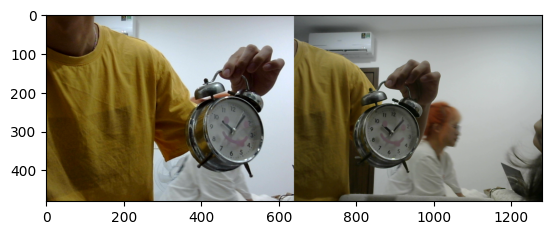

In [63]:
# Display the left image.
plt.imshow(np.hstack([left_image, right_image]))

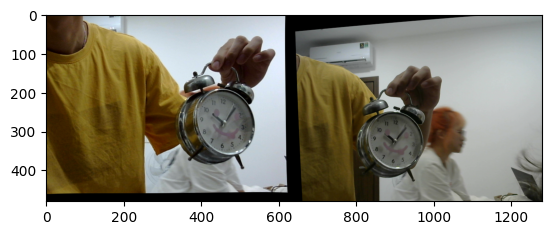

In [64]:
#*************************************
#***** Image processing **************
#*************************************

# Rectify the images on rotation and alignment
Left_nice= cv2.remap(left_image,Left_Stereo_Map[0],Left_Stereo_Map[1], interpolation = cv2.INTER_LANCZOS4, borderMode = cv2.BORDER_CONSTANT)
# Rectify the image using the calibration parameters founds during the initialization
Right_nice= cv2.remap(right_image,Right_Stereo_Map[0],Right_Stereo_Map[1], interpolation = cv2.INTER_LANCZOS4, borderMode = cv2.BORDER_CONSTANT)

# Show the rectified images
plt.imshow(np.hstack([Left_nice, Right_nice]))

In [69]:
# Convert from color(BGR) to gray
grayR= cv2.cvtColor(Right_nice,cv2.COLOR_BGR2GRAY)
grayL= cv2.cvtColor(Left_nice,cv2.COLOR_BGR2GRAY)

# Compute the two images for the Depth_image
disp= stereo.compute(grayL,grayR) # astype(np.float32)/ 16
dispL= disp
dispR= stereoR.compute(grayR,grayL)
dispL= np.int16(dispL)
dispR= np.int16(dispR)

# Using the WLS filter
filteredImg= wls_filter.filter(dispL,grayL,None,dispR)
filteredImg = cv2.normalize(src=filteredImg, dst=filteredImg, beta=0, alpha=255, norm_type=cv2.NORM_MINMAX)
filteredImg = np.uint8(filteredImg)
#cv2.imshow('Disparity Map', filteredImg)
disp= ((disp.astype(np.float32)/ 16)-min_disp)/num_disp # The equation that allows us to have 0 for the farthest detectable object

# Filtering the Results with a closing filter
closing= cv2.morphologyEx(disp,cv2.MORPH_CLOSE, kernel) # Apply an morphological filter for closing little "black" holes for noise removal

# Colors map
dispc= (closing-closing.min())*255
dispC= dispc.astype(np.uint8) # Convert the type of the matrix from float32 to uint8 for displaying
disp_Color= cv2.applyColorMap(dispC,cv2.COLORMAP_OCEAN) # Change the Color of the Picture into an Ocean Color_Map
filt_Color= cv2.applyColorMap(filteredImg,cv2.COLORMAP_OCEAN) # Apply the 'ocean' colormap to the filtered image for higher contrast and clarity

Disparity, Closing


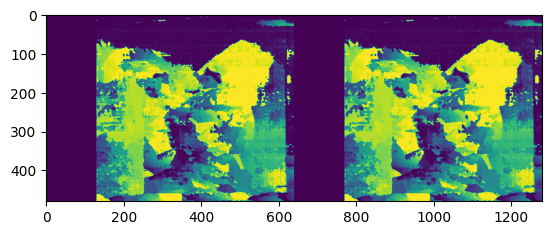

In [71]:
# Show the result for the Depth_image
plt.imshow(np.hstack([disp, closing]))
print('Disparity, Closing')

Color Depth, Filtered Color Depth


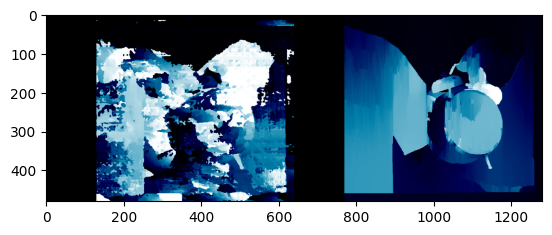

In [72]:
disp_Color = disp_Color[:, :, ::-1]
filt_Color = filt_Color[:, :, ::-1]
plt.imshow(np.hstack([disp_Color, filt_Color]))
print('Color Depth, Filtered Color Depth')

## **Export to point cloud**

The code performs various operations on a disparity map and an image to create a point cloud. 

> The first line normalizes the disparity map values, while the second line loads the left image in color. The code then creates empty arrays to store the 3D coordinates and RGB color values for each pixel in the point cloud. The next lines fill these arrays by iterating through each pixel in the color image and setting the 3D point coordinates and color values. Finally, the code creates a structured numpy array that combines the points and colors arrays into a single array with the x, y, and z coordinates and RGB color values for each point in the point cloud.

In [42]:
# Normalize the disparity map to [0, 255]
disparitynorm = cv2.normalize(disp, disp, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX)

# Load the left image in color
color_image = cv2.imread('left_image.png')

# Create an empty array for the 3D points
points_3D = np.zeros((color_image.shape[0] * color_image.shape[1], 3), dtype=np.float32)

# Create an empty array for the colors
colors = np.zeros((color_image.shape[0] * color_image.shape[1], 3), dtype=np.uint8)

# Fill the 3D points and colors arrays
i = 0
for y in range(color_image.shape[0]):
    for x in range(color_image.shape[1]):
        points_3D[i] = [x, y, disparitynorm[y,x]]
        colors[i] = color_image[y,x]
        i += 1

# Create a vertex element from the 3D points and colors arrays
vertex = np.array([tuple(points_3D[i]) + tuple(colors[i]) for i in range(points_3D.shape[0])], dtype=[('x', 'f4'), ('y', 'f4'), ('z', 'f4'), ('red', 'u1'), ('green', 'u1'), ('blue', 'u1')])

# ****Since the plyfile library cannot be used in jupyter notebook, the point cloud file will be exported using 'demo_pcloud.py'****

# # Create a PlyElement from the vertex element
# el = PlyElement.describe(vertex, 'vertex')

# # Write the point cloud data to a .ply file
# PlyData([el], text=True).write('point_cloud.ply')

__Figure 3:__ Point cloud mesh visualized using MeshLab

![Figure 3](reportImage\pointcloud.png)

## **Object distance calculation**

After the disparity map has been generated, the determination of the distance is necessary. The relationship between the disparity values and the distance needs to be found. To achieve this, the disparity values were experimentally measured at several points in order to determine a regression for later extrapolation.

> *The calculation of object distance is based on the experiments of Uhrweiller Frédéric and Vujasinovic Stéphane from the University of Karlsruhe in Germany.*

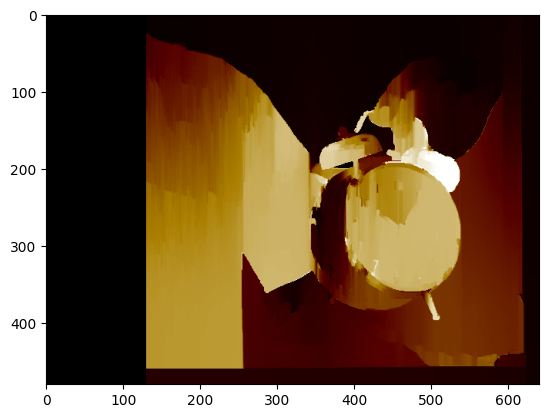

In [47]:
plt.imshow(filt_Color)

In [75]:
# Pick an x-y coordinate on filt_Color that matches the object
x = 400
y = 300

average=0
for u in range (-1,2):
    for v in range (-1,2):
        average += disp[y+u,x+v]
average=average/9
Distance= -593.97*average**(3) + 1506.8*average**(2) - 1373.1*average + 522.06
Distance= np.around(Distance*0.01,decimals=2)
if Distance <= 0.5:
    print('Warning --- Distance: '+ str(Distance)+' m')
else:
    print('Distance: '+ str(Distance)+' m')

Distance: 0.67 m
